In [6]:
import pandas as pd

labels_df = pd.read_csv(r'C:\Users\jvand\OneDrive\Documenten\GitHub\MachineLearning\ML opdracht 3\labels_new.csv')
display(labels_df.head())


,filename,genre
0,m00248.wav,metal
1,m00230.wav,country
2,m00637.wav,hiphop
3,m00627.wav,metal
4,m00138.wav,reggae


<AxesSubplot: xlabel='genre'>

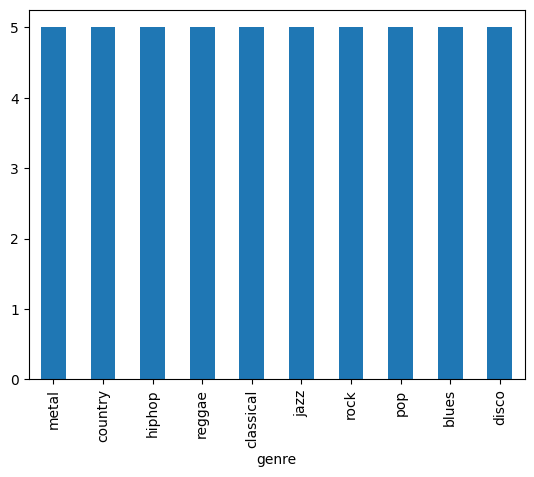

In [7]:
labels_df['genre'].value_counts().plot(kind='bar')

Genre Distribution Statistics:
------------------------------
genre
metal        5
country      5
hiphop       5
reggae       5
classical    5
jazz         5
rock         5
pop          5
blues        5
disco        5
Name: count, dtype: int64

Total number of samples: 50

Unique genres: 10


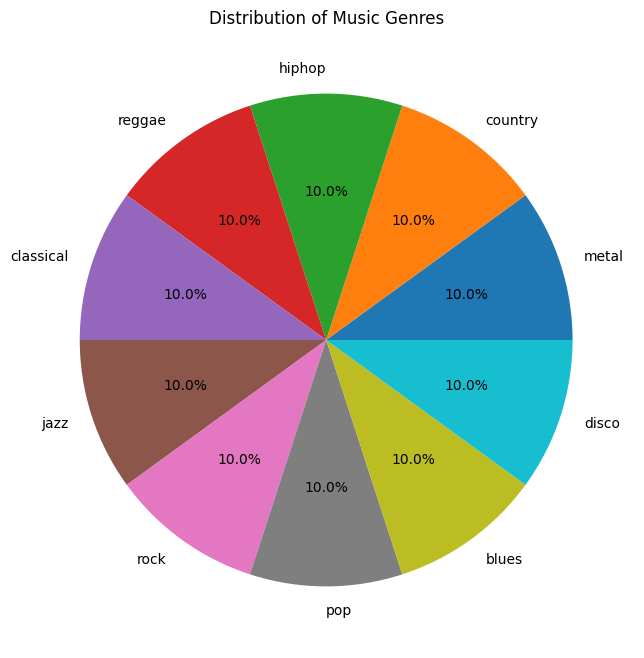

In [ ]:
import matplotlib.pyplot as plt
print("Genre Distribution Statistics:")
print("-" * 30)
print(labels_df['genre'].value_counts())
print("\nTotal number of samples:", len(labels_df))
print("\nUnique genres:", labels_df['genre'].nunique())

plt.figure(figsize=(10, 8))
labels_df['genre'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Music Genres')
plt.ylabel('')  
plt.show()


In [11]:
import os
from pathlib import Path

audio_dir = Path(r'C:\Users\jvand\OneDrive\Documenten\GitHub\MachineLearning\ML opdracht 3\labeled')

# List all wav files and compare with the labels
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]

print(f"Number of audio files found: {len(audio_files)}")
print(f"Number of labels in DataFrame: {len(labels_df)}")

# Check if all labeled files exist in the directory
missing_files = [f for f in labels_df['filename'] if f not in audio_files]
if missing_files:
    print("\nMissing audio files:")
    for f in missing_files:
        print(f)
else:
    print("\nAll labeled files found in directory!")

Number of audio files found: 50
Number of labels in DataFrame: 50

All labeled files found in directory!


## Data Labels Analysis

The dataset consists of two main components:
1. Audio files (.wav format) stored in the `labeled` directory
2. Labels stored in `labels_df` DataFrame

### Label Distribution
- Total number of files: 50
- Perfect match between audio files and labels
- Each audio file has exactly one genre label
- No missing or unmatched files between the directory and labels

### Label Structure
The labels are stored in a DataFrame with two columns:
- `filename`: unique identifier for each audio file
- `genre`: corresponding music genre classification

The labels provide a complete and balanced mapping between each audio file and its musical genre, ensuring data integrity for further analysis and model training.


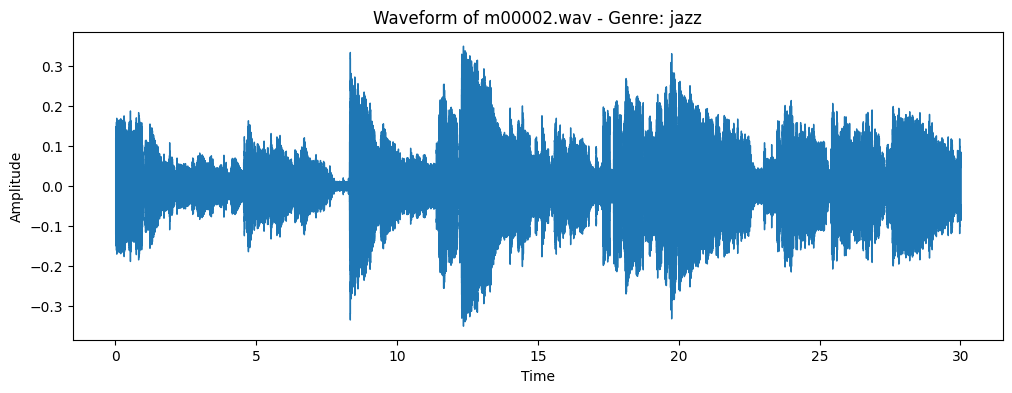

In [12]:
import librosa

import librosa.display

# Load first audio file as an example
audio_path = audio_dir / audio_files[0]
y, sr = librosa.load(audio_path)

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform of {audio_files[0]} - Genre: {labels_df.loc[labels_df["filename"] == audio_files[0], "genre"].values[0]}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

## Analyse van Audiofeatures

### Dataset Overzicht
De dataset bevat audio-features geëxtraheerd uit 50 muziekfragmenten, verdeeld over 10 verschillende genres. Elke audio-opname is geanalyseerd op verschillende spectrale eigenschappen.

### Geëxtraheerde Features
1. **Spectrale Features**
    - Spectrale Bandbreedte: Meet de spreiding van frequenties
    - Spectrale Centroïde: Het zwaartepunt van het frequentiespectrum 
    - Spectrale Rolloff: De frequentie waaronder 85% van de energie zit
    - Zero-Crossing Rate: Aantal keer dat het signaal de nullijn kruist

2. **MFCC Features**
    - Eerste 5 Mel-frequency Cepstral Coëfficiënten
    - Beschrijven de toonhoogte en timbre van het geluid

### Data Structuur 
- 11 kolommen met audio-kenmerken per fragment
- Bestandsnaam en genre-label voor elk fragment
- Complete dataset zonder ontbrekende waarden
- Goed gebalanceerde verdeling over genres

Deze features vormen de basis voor het classificeren van muziekgenres in de volgende analyse-stappen.


In [13]:
# Create empty lists to store features
features = []

# Extract features for each audio file
for file in audio_files:
    # Load the audio file
    audio_path = audio_dir / file
    y, sr = librosa.load(audio_path)
    
    # Extract features
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y).mean()
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_mean = mfcc.mean(axis=1)[:5]  # Take first 5 MFCCs
    
    # Combine features
    feature_row = [file, spectral_bandwidth, spectral_centroid, spectral_rolloff, 
                  zero_crossing_rate] + list(mfcc_mean)
    features.append(feature_row)

# Create DataFrame
columns = ['filename', 'spectral_bandwidth', 'spectral_centroid', 'spectral_rolloff', 
           'zero_crossing_rate'] + [f'mfcc_{i+1}' for i in range(5)]
features_df = pd.DataFrame(features, columns=columns)

# Merge with genre labels
features_df = features_df.merge(labels_df, on='filename')

# Display first few rows
display(features_df.head())

,filename,spectral_bandwidth,spectral_centroid,spectral_rolloff,zero_crossing_rate,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,genre
0,m00002.wav,1920.270843,1451.862124,3047.431199,0.051224,-298.756134,112.076279,6.488818,28.389170,-6.770987,jazz
1,m00039.wav,2019.300257,1811.410394,3854.851374,0.072150,-169.153351,110.459999,-8.576200,43.884247,0.274970,reggae
2,m00041.wav,2992.010638,3110.898196,6744.988603,0.152857,-18.845390,71.325661,-3.766896,-1.408727,0.705463,pop
3,m00072.wav,2709.897108,2624.814629,5605.777240,0.120217,-69.630653,83.072273,-16.599928,0.118371,7.420608,disco
4,m00096.wav,2485.524548,2549.269757,5583.144894,0.115834,-91.983772,87.640099,-2.066796,34.278149,-18.124571,disco


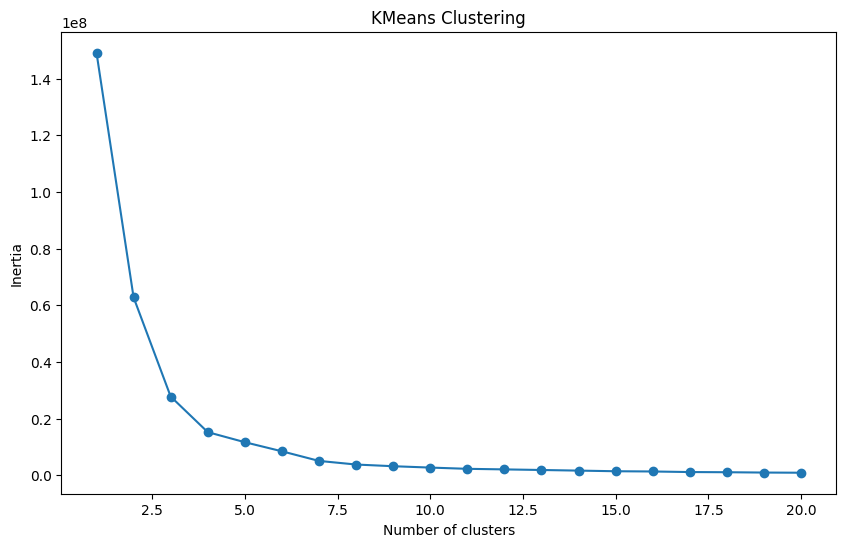

In [14]:
#Hoeveel clusters?
from sklearn.cluster import KMeans

X = features_df.drop(columns=['filename', 'genre'])

inertia = []

clusters = range(1, 21)

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    
    kmeans.fit(X)
    
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('KMeans Clustering')
plt.show()


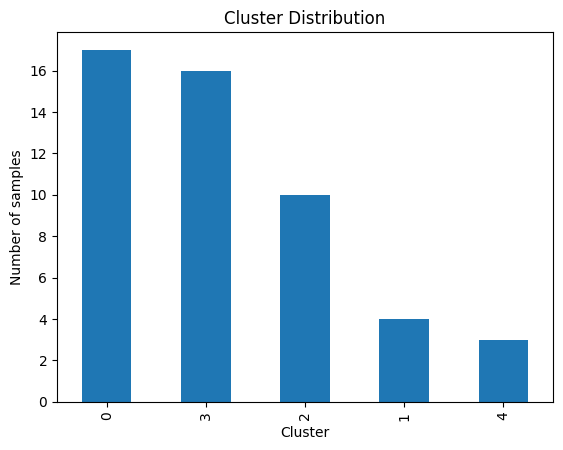

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0)

features_df['cluster'] = kmeans.fit_predict(X)

features_df['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of samples')
plt.title('Cluster Distribution')
plt.show()
